Dual Domain Decomposition Approach for the Free Vibration Analysis of Mistuned Blade-Disk
------------------------------------------------------------------------------------------------------------------------------------

Periodic cyclic strutures are presented in manu engineering problems, such as turbines, gear, fans, etc.
The classical approach to treated such geometries is to apply the Harmonic Decomposition of the sectors, which leads to a set of decouple system of equations based in the Harmonic coordinates. This approach can only be used when of the sectors have the same stiffness and mass matrices. In the case of blade-disk, small variations of the individual blades characteristics during the manufacturing process invalidates the cyclicy hipotheses. It is well known that the dynamic response of mistuned bladed-disk can be significantly different from its tuned counterpart. The complete mistuned problem is much larger than, and strategies presented in [????] can be found to reduce the computational cost.
In this work, a dual domain decomposition approach is utilized to efficient compute the eigensolution of the mistuned problem.

Let us considered a cyclic geometry composed by $N$ sectors, see Figure below:


<img src="Figures/simple_turbine_v6.png" style="width: 400px">

The equation of motion and compatibility equation for each sector $s$ can be written as:

$$
M^{s}\ddot{u}^s + K^s u^s = f^s + g^s \;\;\;    s = 1,...,N\\
B^s_L u^s = B_R^{(s+1)} u^{(s+1)} \\
B^s_L g^s = -B_R^{(s+1)} g^{(s+1)}
$$

where $M$ and $K$ are mass and stiffness matrices respectivaly, $B_L$ and $B_R$ are Boolean matrices for seelcting left and right dofs respectivaly. If mistuning is considered, $M^s$ and $K^s$ vary with the sector index, however because the some topology $B_L^s =  B_L^{(s+1)}$ and  $B_R^s =  B_R^{(s+1)}$ for all sectors. If we define block matrices such that $M^D = block [M^1,...,M^N]$, $K^D = block [K^1,...,K^N]$, and a global Boolean matrix for all constraints such that $B u = 0$ where $u = [u^1,...,u^N]$ the equation of motion can be written as:



$$
M^D\ddot{u} + K^D u = f + B^T \lambda \\
Bu = 0 \\
$$

The above system can be written in matrix notation :

$$ 
 \begin{bmatrix}
M^D & 0 \\
0 & 0  \\
\end{bmatrix}
\begin{bmatrix}
\ddot{u} \\
\lambda  
\end{bmatrix}
+
\begin{bmatrix}
K^D & B^T \\
B & 0  \\
\end{bmatrix}
\begin{bmatrix}
u \\
\lambda  
\end{bmatrix}
=
\begin{bmatrix}
f \\
0
\end{bmatrix}
 $$



For free vibration analysis of the mistuned assumes that no external forces applied and that the displacement are harmonic. If the defined the primal assembly matrix $u_\text{primal}=Lu$ such that $B L = 0$, than the free vibration problem is governed by the following eigenproblem:

$$ ( \bar{\mathbf{K}} - \omega^2 \bar{\mathbf{M}} ) u_\text{primal} = 0 $$

where $\bar{\mathbf{K}} = L^T \mathbf{K^D} L $ and  $\bar{\mathbf{K}} = L^T \mathbf{M^D} L $.   Using the same block diagonal notation the dual form of the eigenvalue problem is:

$$ 
\begin{bmatrix}
K^D & B^T \\
B & 0  \\
\end{bmatrix}
\begin{bmatrix}
u \\
\lambda  
\end{bmatrix}
 = \omega^2 
 \begin{bmatrix}
M^D & 0 \\
0 & 0  \\
\end{bmatrix}
\begin{bmatrix}
u \\
\lambda  
\end{bmatrix}
 $$
 
The eigenproblem is generally solved Krylov subspace iteration and orthogonalization. The inverse iteration has the form:

$$ 
\begin{bmatrix}
K^D & B^T \\
B & 0  \\
\end{bmatrix}
\begin{bmatrix}
u_{n+1} \\
\lambda_{n+1}  
\end{bmatrix}
 = 
 \begin{bmatrix}
M^D & 0 \\
0 & 0  \\
\end{bmatrix}
\begin{bmatrix}
u_{n} \\
\lambda_{n}  
\end{bmatrix}
 $$
 
where $B u_n = 0$. By inspecting the right hand side of the above equation, it is visible that $\lambda$ depency is lost during the iterations. The vector $[M^D u_n, 0]$ does not necessarily lie in the image generated by the dual assembly operator. Therefore, it is convinient to define the projected eigenproblem associeted with the dual formulation:


$$ P^T K^D P u = \omega^2 P^T  M^D P u $$

Where $P= I - B^T(BB^T)^{-1}B$ is a projection matrix. This problem is also singular, but the right hand-side vector lies in the feasible space. The inverse iteration of the above is written as:

$$ P^T K^D P u_{n+1} =  P^T  M^D P u_n $$

The above system can be solved by a Preconditioned Conjugate Gradient, as shown in [????].
The solution of the above system is equivalente of solving the following problem:



$$ 
\begin{bmatrix}
K^D & B^T \\
B & 0  \\
\end{bmatrix}
\begin{bmatrix}
u_{n+1} \\
\lambda_{n+1}  
\end{bmatrix}
 = 
 \begin{bmatrix}
P^T M^D P & 0 \\
0 & 0  \\
\end{bmatrix}
\begin{bmatrix}
u_{n} \\
\lambda_{n}  
\end{bmatrix}
$$


An inverse iteration such as described above is equivalent to a static problem. At every iteration one can write the dual interface problem if where matrix in $K^D$ is not singular.

$$ 
F \lambda_{n+1} = d
$$

where $F = B K^{D*} B^T$, $d = B K^{D*}(P^T M^D P u_n)  $. If the interfaces do not intersection each other, then it is possible to show that $(BBT)^{-1} = 0.5 I$ and the projection $P$ can be written as:

$$P= I - 0.5B^TB$$

Which reduces the computational cost of the iteration mentioned above.

Sector Perturbation
--------------------


In this section the sector perturbation is descript. In the present work, every sector matrix is a summation of a reference matrix plus a perturbation matrix.

$$ 
K^s  = K^r + \delta K^s \\
M^s  = M^r + \delta M^s
$$

where the superscript $r$ represents the reference matrix and $\delta$ represents the pertubation.
In term of components the pertunbation matrix can be written as:

$$
\delta K^s = \sum_{i=1}^{N}\sum_{j=1}^{N} k_{ij} e_i \otimes e_j
$$

which is also valide for the mass matrices. In the present work we define the basis that comes from the solution of the eigenvalue problem:

$$ K^r e_i = \omega^2 M^r e_i $$

Given the eigenmatrix $E = [e_1,e_2,...,e_N]$ the perturbation matrix can be written as:

$$
\delta K^s =  E [\hat{K}] E^T
$$

The perturbation can be truncated by selecting $m < N $ modes such that $\tilde{E} = [e_1,e_2,..., e_m]$, and $\hat{K}$ has m by m size.


In [1]:
%matplotlib notebook
import numpy as np
import amfe
import matplotlib.pyplot as plt
import numpy as np
from pyfeti import utils, linalg, perturbation
from pyfeti import feti_solver as fetisolver
import pandas as pd
from scipy import sparse
import scipy


# reading the mesh of the reference sector
mshfile = r'..\mesh\one_third_ring.msh'
m = amfe.Mesh()
m.import_msh(mshfile)

Python was not able to load the fast fortran assembly routines.

Python was not able to load the fast fortran material routines.



<IPython.core.display.Javascript object>


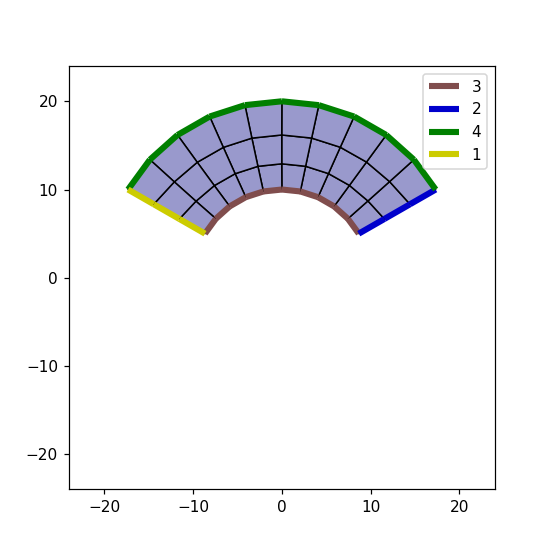

(-24.0, 24.0)

In [2]:
fig, ax1 = plt.subplots(figsize=(5,5))
amfe.plot2Dmesh(m,ax=ax1)
lim = 1.2*np.array([-20,20])
ax1.set_xlim(lim)
ax1.set_ylim(lim)

In [3]:
# creating a mechanical component
my_comp = amfe.MechanicalSystem()
my_comp.set_mesh_obj(m)
E=210E9
my_material = amfe.KirchhoffMaterial(E=E, nu=0.3, rho=7.86E3, plane_stress=True, thickness=1.0)
my_comp.set_domain(5,my_material)

# assembling the reference sector matrices
Kr, f = my_comp.assembly_class.assemble_k_and_f()
Mr = my_comp.assembly_class.assemble_m()

theta = 2.0*np.pi/3.0 #


Preallocating the stiffness matrix
Done preallocating stiffness matrix with 30 elements and 88 dofs.
Time taken for preallocation: 0.00 seconds.


In [11]:
Kr

<88x88 sparse matrix of type '<class 'numpy.float64'>'
	with 1240 stored elements in Compressed Sparse Row format>

In [4]:
# defining names for dofs
id_matrix = my_comp.assembly_class.id_matrix
id_map_df = utils.dict2dfmap(id_matrix )

group_dict = utils.OrderedDict()

m.split_in_groups()
node_set_1 = m.groups[1].global_node_list # Left
node_set_2 = m.groups[2].global_node_list # Right
node_set_3 = m.groups[3].global_node_list # Dirichlet

# Defining a new node order in the right side to match with the left side
new_node_set_right = linalg.find_cyclic_node_pairs(node_set_1,node_set_2,theta,m.nodes)

manager_obj = utils.DofManager(id_map_df)

group_dict = utils.OrderedDict()
group_dict['Dirichlet'] = utils.OrderedSet(manager_obj.get(node_set_3,'xy'))
group_dict['Left'] = utils.OrderedSet(manager_obj.get(node_set_1,'xy'))
group_dict['Right'] = utils.OrderedSet(manager_obj.get(new_node_set_right,'xy'))

s = utils.SelectionOperator(group_dict, id_map_df)

In [5]:
# introducing Dirichlet B.C in the sector
Krd, sred = s.assemble_matrix(Kr,['Left','Right','internal'],True)
Mrd, sred = s.assemble_matrix(Mr,['Left','Right','internal'],True)

# creating pertubation matrices:
Op = linalg.LinearSys(Krd,Mrd)
D = Op.getLinearOperator()
m = 10
eigval, V = sparse.linalg.eigs(D,k=m)
omega = np.sqrt(1/eigval).real
freq = omega/(2*np.pi)
# domain 1
scale = 1.0E-6
sigma = E*scale
delta_K1 = perturbation.eigvec_perturbation(V.real,seed=1,sigma=sigma)

# domain 2
delta_K2 = perturbation.eigvec_perturbation(V.real,seed=2,sigma=sigma)

# domain 3
delta_K3 = perturbation.eigvec_perturbation(V.real,seed=3,sigma=sigma)


In [6]:
# assembling the pertubation matrix and applying rotation to sectors
ndofs=Krd.shape[0]
R1 = linalg.create_voigt_rotation_matrix(ndofs,theta,dim=2)
R2 = linalg.create_voigt_rotation_matrix(ndofs,2*theta,dim=2)

apply_rotation = lambda A,R : R.T.dot(A.dot(R))


# sector 1
K1 = Krd + delta_K1
M1 = Mrd

# sector 2
K2 = apply_rotation(Krd + delta_K2,R1)
M2 = apply_rotation(Mrd,R1)

# sector 3
K3 = apply_rotation(Krd + delta_K2,R2)
M3 = apply_rotation(Mrd,R2)

In [7]:
# build FETI solver structure
B1 = sred.build_B('Left')
B2 = sred.build_B('Right')
n_sectors = 3
K_list = [K1,K2,K3]
M_list = [M1,M2,M3]
K_dict = {}
M_dict = {}
B_dict = {}
f_dict = {}
for i in range(1,n_sectors+1):
    K_dict[i] = K_list[i-1]
    M_dict[i] = M_list[i-1]
    iplus = i + 1
    iminus = i - 1
    if iminus==0:
        iminus = 3
    if iplus==4:
        iplus = 1
        
    B_dict[i] = {(i,iplus):B1,(i,iminus):B2}
    f_dict[i] = np.zeros(K_list[i-1].shape[0])

C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\ndcsi\lib\site-packages\scipy\sparse\compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


Solving Projected Eigenvalue Problem
------------------------------------------------------


$$ P^T K P u = \omega^2 P^T  M P u $$

In [8]:
feticase = fetisolver.FETIManager(K_dict,B_dict,f_dict)
feticase2 = fetisolver.FETIManager(M_dict,B_dict,f_dict)
K_global, f_global = feticase.assemble_global_K_and_f()
M_global, f_global = feticase2.assemble_global_K_and_f()
B = feticase.assemble_global_B().tocsc()

K_global, M_global = K_global.tocsc(), M_global.tocsc()

BBT = B.dot(B.T)
BBT_inv = sparse.linalg.inv(BBT)
#P = sparse.eye(K_global.shape[0]) - B.T.dot(BBT_inv.dot(B))
P = sparse.eye(K_global.shape[0]) - 0.5*B.T.dot(B)

In [9]:
lo_obj = linalg.ProjLinearSys(K_global,M_global,P)
Dp_new = lo_obj.getLinearOperator()
w2new, v2new = sparse.linalg.eigs(Dp_new, k=20)
new_id = np.argsort(w2new)[::-1]
w2new = w2new[new_id]
v2new = v2new[:,new_id]
eigenvalues = 1.0/(w2new.real)
omega = np.sqrt(eigenvalues)
frequency = omega/(2.0*np.pi)

C:\Users\ge72tih\AppData\Local\Continuum\anaconda3\envs\ndcsi\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


In [10]:
frequency

array([ 59.1765761 , 125.78575533, 148.4233434 , 178.89558459,
       186.17862535, 206.32072378, 217.966408  , 227.85668362,
       262.50467145, 263.97476711, 284.73273384, 286.22536402,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan])